In [1]:
from matplotlib import pyplot as plt
from matplotlib import colors, cm
from matplotlib.collections import LineCollection
from matplotlib.patches import Circle
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import trackpy as tp
from scipy.signal import savgol_filter
from scipy.interpolate import UnivariateSpline
import random as rand
from tqdm import tqdm
from scipy.optimize import curve_fit

In [2]:
def read_tuple_list(x):
    x_strip = x.strip('()').strip('[]')
    if len(x_strip.split(', ')) == 1:
        return np.array(x_strip.split(), dtype=float)
    else:
        return np.array(x_strip.split(', '), dtype=float)

In [3]:
#Defining a basic power law function to fit to our wave relations r^2:
def func_powerlaw(x, a, m):
    return m*x**a

In [4]:
#Defining a basic power law function to fit to our wave relations r^2:
def func_powerlaw_simple(x, a):
    return x**a

In [5]:
#To consolodate all the wave dataframes in a set, use the following function: 
#INPUT: Sorted list of all wave dataframe csv locations:
#Option to save the DF as a csv in the relevant location is given, default is False
#OUTPUT: A dataframe containing all of the csv wave DFs in the path list

def consolidate_waves(WAVE_DF_PATHS, save_DF = False):
    
    wave_collect = []

    for wave_df_path in tqdm(WAVE_DF_PATHS):
        img_id = int(wave_df_path.stem.split('_')[0]) #Get the image ID to match to the wave:
        wave_df = pd.read_csv(wave_df_path, converters={"wave_centroid": read_tuple_list}) #Open the wave_DF from step4 analysis
        wave_df = wave_df[wave_df.columns.drop(list(wave_df.filter(regex='Unnamed')))] #Strip it of any weird unnamed index columns
        track_ids = wave_df['clTrackID'].values #Get the collective track values in the wave
        wave_df['wave_ID'] = [str(img_id) + '-' + str(i) for i in track_ids] #Build a list of unique wave IDs from the image number and clTrack number they belong to
        wave_df['image_ID'] = [img_id for i in range(len(wave_df))]
        wave_collect.append(wave_df)
    
    wave_df_collected = pd.concat(wave_collect, ignore_index=True)
    
    if save_DF:
        wave_df_collected.to_csv(WAVE_DF_PATHS[0].parent / 'combined_wave_DF.csv', index=False)
        
    return wave_df_collected

In [6]:
#Lets import an arcos set, wave data, and the corresponding tracking data...
base_path = Path.cwd().parent / 'Data Sets/2023_02_07_DPI-nadphox-inhib'
images_folder = base_path / 'images'
analysis_output_destination = base_path / 'wavefit_outputs'

wave_dataframe_paths = sorted(analysis_output_destination.glob('*_wave_df.csv'), key=lambda x: x.stem.split('_')[0])


In [7]:
wave_con_df = consolidate_waves(wave_dataframe_paths)
wave_con_df['real_time'] = wave_con_df['rel_time'] * 5.0

100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 424.54it/s]


In [8]:
trackable_waves = wave_con_df[wave_con_df['trackable'] == True]


/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

Text(0, 0.5, 'Radius (um)')

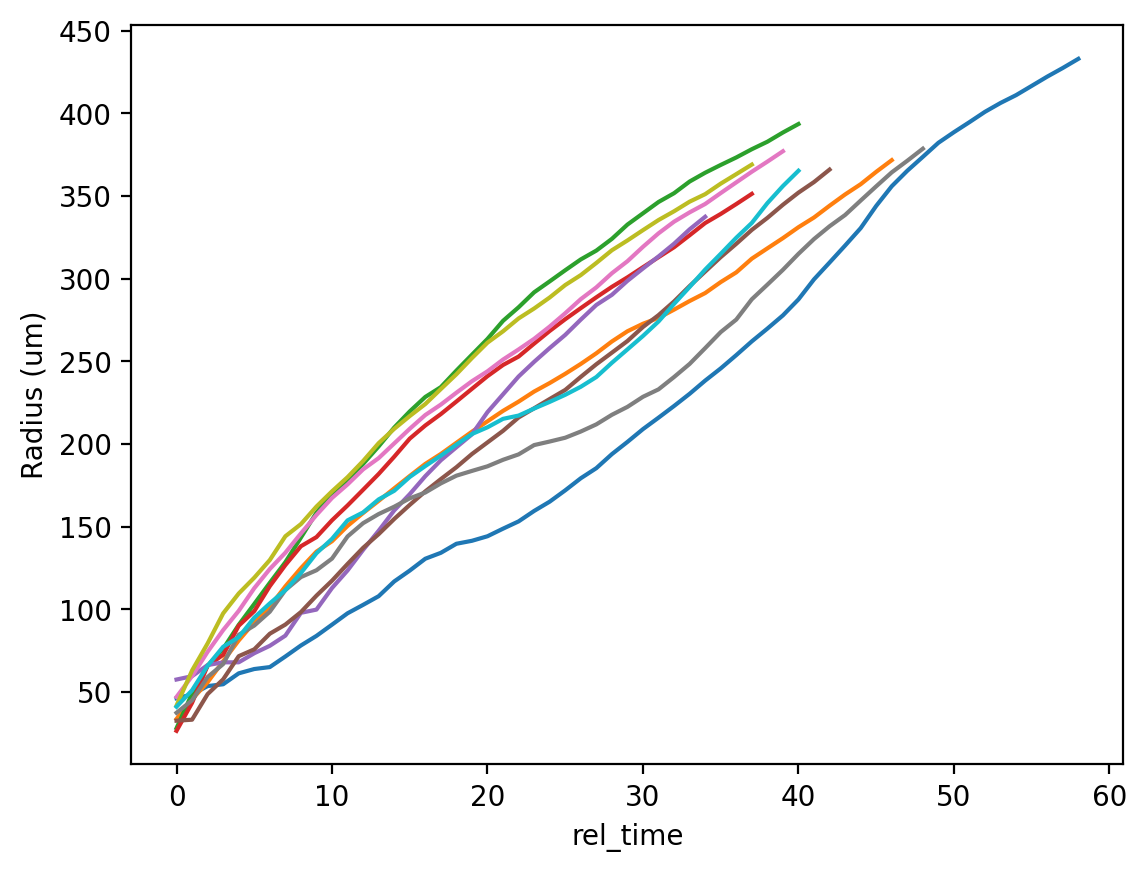

In [9]:
#Next are key wave analysis functions:
#Plotting all the waves in a set
plt.figure(dpi=200)
sns.lineplot(data=trackable_waves[trackable_waves['split']==0], x='rel_time', y='circle_radius', hue='wave_ID', legend = False)
plt.ylabel('Radius (um)')

/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

Text(0, 0.5, 'Radius (um)')

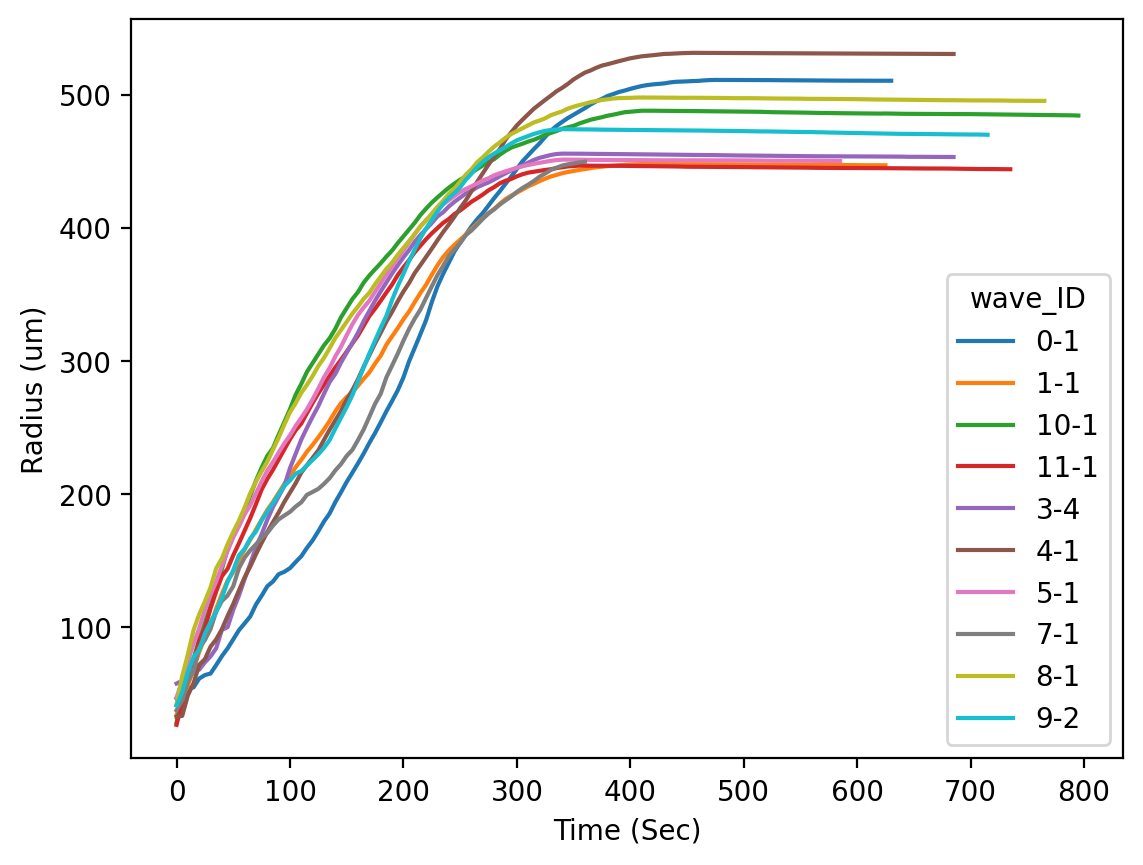

In [10]:
#Next are key wave analysis functions:
#Plotting all the waves in a set
plt.figure(dpi=200)
sns.lineplot(data=trackable_waves, x='real_time', y='circle_radius', hue='wave_ID')
plt.xlabel('Time (Sec)')
plt.ylabel('Radius (um)')

/var/folders/jb/q2707w2155s00qd5b8lpx_6m0000gn/T/ipykernel_59201/632770545.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=trackable_waves,x='real_time', y='r_squared', ci='sd', label='Data')
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

Text(0, 0.5, 'Radius Squared (um^2)')

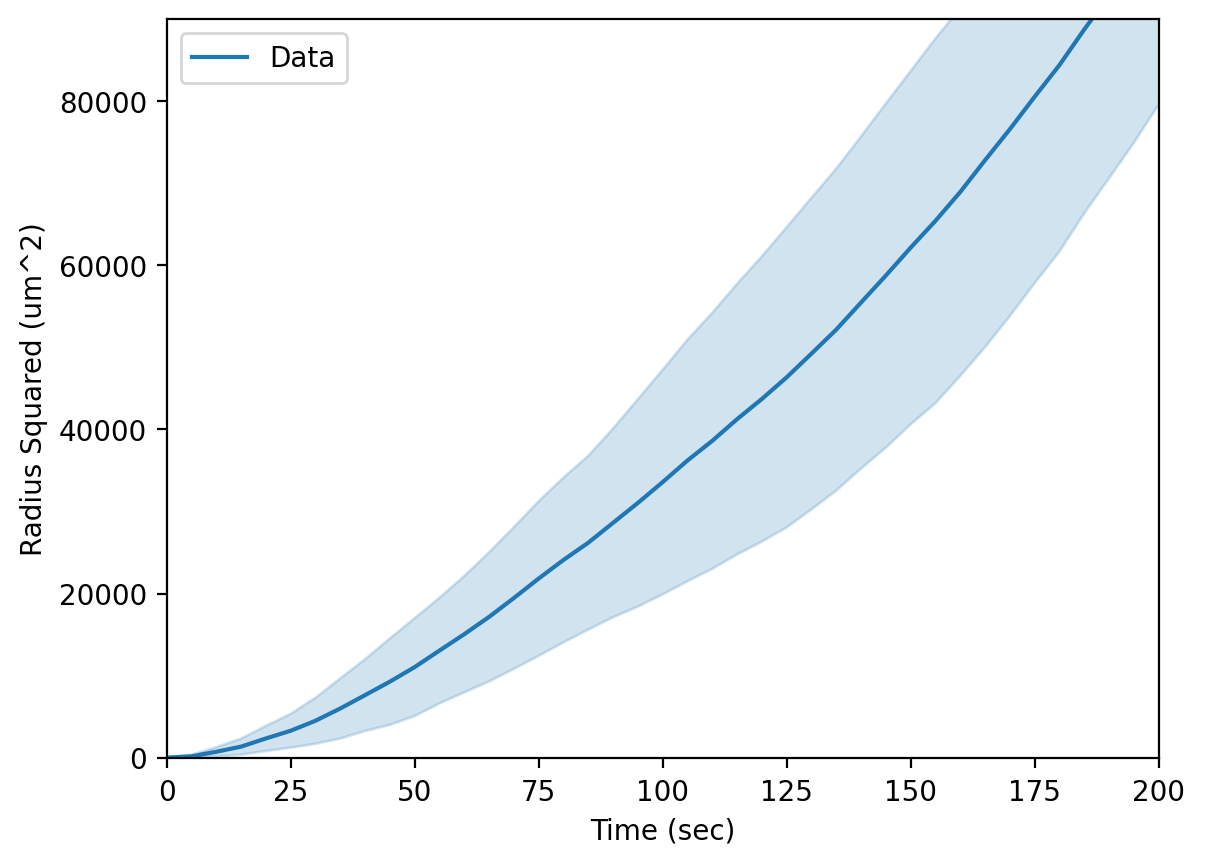

In [14]:
#plot the results with the title showing the fit parameters

plt.figure(dpi=200)
sns.lineplot(data=trackable_waves,x='real_time', y='r_squared', ci='sd', label='Data')
plt.legend()
plt.xlim(0,200)
plt.ylim(-100,90000)
plt.xlabel('Time (sec)')
plt.ylabel('Radius Squared (um^2)')

/var/folders/jb/q2707w2155s00qd5b8lpx_6m0000gn/T/ipykernel_59201/3252217312.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=trackable_waves,x='real_time', y='radius_velocity', ci='sd', label='Data')
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futur

Text(0, 0.5, 'Radius Velocity (um/s)')

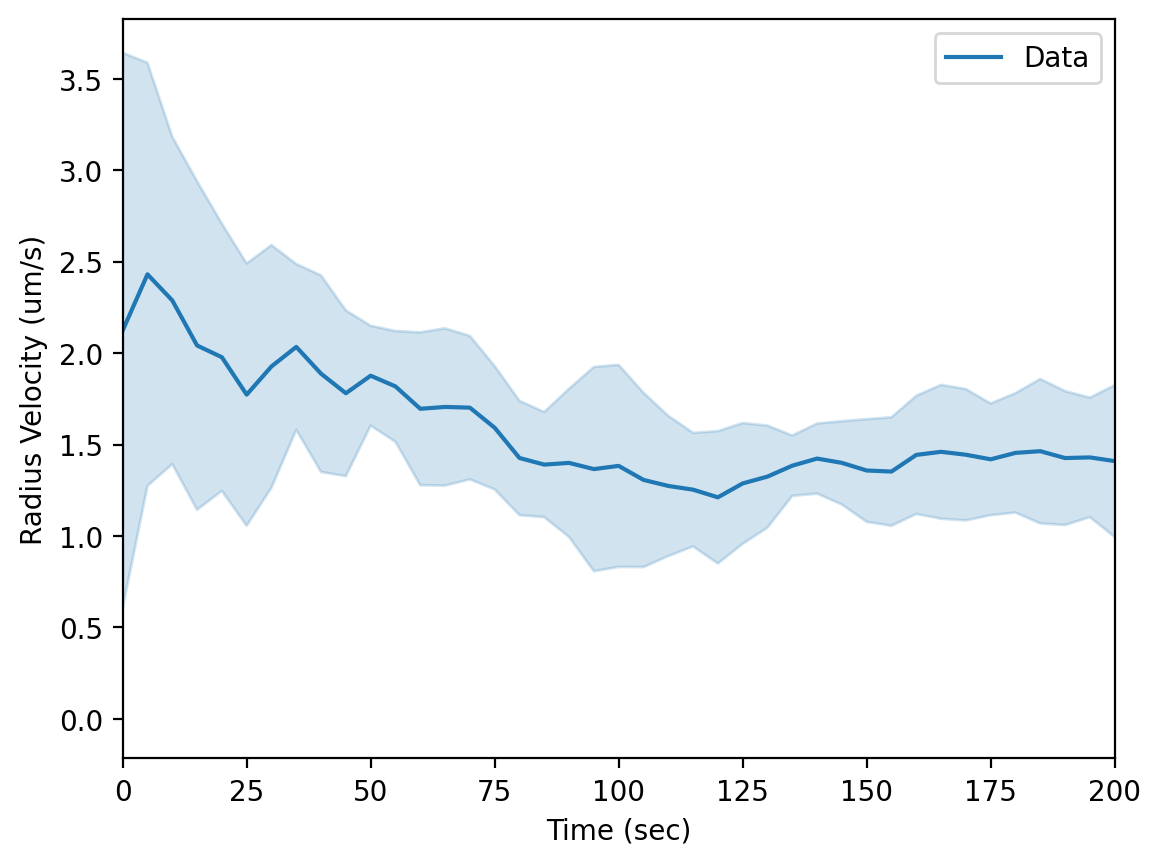

In [15]:

plt.figure(dpi=200)
sns.lineplot(data=trackable_waves,x='real_time', y='radius_velocity', ci='sd', label='Data')
plt.legend()
plt.xlim(0,200)

plt.xlabel('Time (sec)')
plt.ylabel('Radius Velocity (um/s)')

In [11]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5, 'font.family': ['arial'], 'axes.linewidth':2})


In [24]:
#relay_output = pd.read_csv('/media/echo/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Fig3 - Model vs Data Stop/model/simple_relay_output.csv')
relay_output = pd.read_csv(Path.cwd().parent / 'Fig2 - Wave kinetics/diffusion relay compare/fits/DPI_relay_fit.csv')
relay_output['r_2'] = (relay_output['r_relay'] - 15)**2

/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

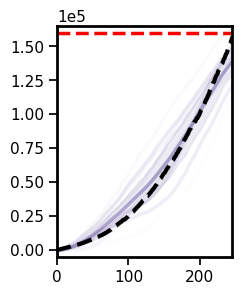

In [26]:
#Waves are split into growing and receeeding by their calcium signal in step4, 
#MAX CALCIUM peak as of 20221013
#This means we can look at wave starts and wave ends seperately by splitting our DF by when the split column is either 0 or 1:

#PRESPLIT IS EARLY WAVE DYNAMICS:

#This is so we can also fit a power law to this data to see how its R^2 values evolve in time, 
#>1 is superdiffusive
#=1 is diffusive behavior
#<1 is subdiffuisive

#Get values pre-split
wave_initial = trackable_waves[trackable_waves['real_time'] < 250]

#Fit to our power law eq defined above where x=time, y=R^2
#Because time will matter for fit, timestep to time is 5sec/frame:
#pars, cov = curve_fit(f=func_powerlaw, xdata=wave_initial.real_time.values, ydata=wave_initial.r_squared.values, p0=[1, 100])

#Note, pars is an array of [a, b, m] where m*x**a

#Interpolate time values to graph alongside data:
t_interpol = np.linspace(0,wave_initial.real_time.max())

#plot the results with the title showing the fit parameters
plt.figure(figsize=(2.25,3))
sns.lineplot(data=wave_initial,x='real_time', y='r_squared', color='#A9A0CA')
sns.lineplot(data=wave_initial,x='real_time', y='r_squared', hue='wave_ID', palette='Purples', alpha=0.1, legend=False)
sns.lineplot(data=relay_output, x='time', y='r_2', linestyle='--', color = 'k', linewidth=3)
#plt.plot(t_interpol, func_powerlaw(t_interpol, *pars), linestyle='--', linewidth=2, color='black')
plt.hlines(160000,0,275, colors='r', linestyles='--')
plt.xlim(0,wave_initial.real_time.max())
plt.ylim(-5000,165000)
plt.xlabel('')
plt.ylabel('')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('fig3-dpi-waves-msd.png', dpi=300, bbox_inches='tight')

In [23]:
wave_initial.groupby('real_time').rel_r.mean().to_csv('fig3-time-v-radius-dpi.csv')

In [68]:
print('Fit: {}x^{}'.format(pars[1], pars[0]))
print('Volunteer N: {}'.format(str(len(wave_initial['volunteer_ID'].unique()))))
print('Wave n: {}'.format(str(len(wave_initial['wave_ID'].unique()))))

Fit: 4.0841329402537205x^1.907296521604097
Volunteer N: 3
Wave n: 10


In [69]:
wave_fits = []

for wid, wave in wave_initial.groupby('wave_ID'):
    #Fit to our power law eq defined above where x=time, y=R^2
    #Because time will matter for fit, timestep to time is 5sec/frame:
    pars, cov = curve_fit(f=func_powerlaw, xdata=wave.real_time.values, ydata=wave.r_squared.values, p0=[1, 100])
    wave_fits.append([wid, pars[0], pars[1]])

In [70]:
wave_fits_DF = pd.DataFrame(np.array(wave_fits, dtype=object), columns=['wid', 'alpha', 'm'])

In [74]:
wave_fits_DF.alpha.mean()

1.766837696592879

In [75]:
wave_fits_DF.alpha.std()

0.5308621835417495

In [71]:
sns.set_context("notebook", font_scale=1.33, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})


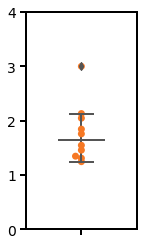

In [72]:
#Get values pre-split

fig, ax = plt.subplots(figsize=(2,4))
sns.boxplot(data=wave_fits_DF, y='alpha', color=sns.color_palette('Oranges')[3],  width=0.001, ax=ax, zorder=2)
sns.boxplot(data=wave_fits_DF, y='alpha', color=sns.color_palette('Oranges')[3],  showbox=False, width=0.4, ax=ax, zorder=3)
sns.swarmplot(data=wave_fits_DF, y='alpha', color=sns.color_palette('Oranges')[3], size=7, ax=ax, zorder=1)
ax.tick_params(direction='out', width=2, labelsize=14)
#plt.ylim(0,50000)
plt.xlabel('')
plt.xticks([0],[''])
plt.ylim(0,4)
plt.ylabel('')
plt.savefig('supplemental-fig3-dpi-indiv-fits.png', dpi=300, bbox_inches='tight')

In [48]:
wave_initial = trackable_waves[trackable_waves['real_time'] < 260]

wave_fits = []


for wid, wave in wave_initial.groupby('wave_ID'):
    #Fit to our power law eq defined above where x=time, y=R^2
    #Because time will matter for fit, timestep to time is 5sec/frame:
    pars, cov = curve_fit(f=func_powerlaw_simple, xdata=wave.real_time.values, ydata=wave.r_squared.values, p0=[2])
    wave_fits.append(pars[0])
    
np.mean(wave_fits)


2.1642080451428263

In [49]:
np.std(wave_fits)

0.03384380013481653

In [50]:
wave_fits

[2.0929113879326855,
 2.146241490914726,
 2.2140968365934373,
 2.189984977789642,
 2.161843724948311,
 2.166765058351671,
 2.1817139547922024,
 2.1231691049013053,
 2.1929164555441822,
 2.1724374596601006]

Fit: 2.256946528908366x^2.03392984994811
Volunteer N: 1
Wave n: 1


In [14]:
trackable_waves.to_csv('dpi_wave_fig2_DF.csv')

In [9]:
arcos_dataframe_paths = sorted(analysis_output_destination.glob('*_ARCOS_df.csv'), key=lambda x: x.stem.split('_')[0])

In [12]:
arcos_df = pd.read_csv(arcos_dataframe_paths[0])
arcos_ex =  arcos_df[arcos_df.clTrackID == 1]
arcos_ex = arcos_ex[arcos_ex['timepoint'] < 130]
#dpi_wave_df = trackable_waves[trackable_waves['wave_ID'] == '0-1']
arcos_ex['real_time'] = 5.0*(arcos_ex['timepoint'] - arcos_ex['timepoint'].values[0])

In [13]:


ex_wave_df = pd.read_csv("/Volumes/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Data Sets/2023_02_07_DPI-nadphox-inhib/control_example_set/wavefit_outputs/0_wave_df.csv", converters={"wave_centroid": read_tuple_list})

ex_wave_df['real_time'] = 5.0*(ex_wave_df['timepoint'] - ex_wave_df['timepoint'].values[0])

In [14]:
arcos_ex['real_time'] = 5.0*(arcos_ex['timepoint'] - arcos_ex['timepoint'].values[0])

In [15]:
control_ex_arcos = pd.read_csv('/Volumes/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Data Sets/2023_02_07_DPI-nadphox-inhib/control_example_set/wavefit_outputs/0_ARCOS_df.csv')
control_ex_arcos =  control_ex_arcos[control_ex_arcos.clTrackID == 7]
control_ex_arcos['real_time'] = 5.0*(control_ex_arcos['timepoint'] - control_ex_arcos['timepoint'].values[0])
control_excontrol_ex_arcos_arcos = control_ex_arcos.reindex(index=control_ex_arcos.index[::-1])

In [23]:
sns.set_context(font_scale=1.2, rc={"lines.linewidth": 2, "font.family": ["arial"], "axes.linewidth":2})


In [84]:

cmapp2 = sns.color_palette('viridis', as_cmap=True)
norma = plt.Normalize(arcos_ex['real_time'].min(), arcos_ex['real_time'].max()-30)

final_times = [50,87,128]

for t_max in final_times: 
    fig, ax = plt.subplots(figsize=(4,4))
    
    arcos_up_to = arcos_ex[arcos_ex['timepoint'] < t_max].reindex(index=arcos_ex.index[::-1])
    ax.scatter(arcos_up_to['x'],arcos_up_to['y'], c=arcos_up_to['real_time'], cmap=cmapp2, norm=norma, linewidth=0.5, alpha=1, s=8, zorder = -10)
    
    
    wave_tp = dpi_wave_df[dpi_wave_df['timepoint'] == t_max]
    
    c = Circle(wave_tp.wave_centroid.values[0], wave_tp.circle_radius.values[0]/2.2, fill=False, edgecolor="red", linestyle="--", linewidth=3)
    ax.add_patch(c)
    
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(0,402)
    plt.ylim(0,402)
    ax.set_aspect(1)
    filename = "/Volumes/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Fig3 - Model vs Data Stop/data_outputs/data_arcos_DPI_t{}.png".format(t_max)
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.close()
#plt.savefig('fig3-dpi-coloredpointsplot.png')